The PyBLS module is a python module specifically designed to interact with the Bureau of Labor Statistics API and transform the results into a Pandas Dataframe. https://pypi.org/project/bls-data/#description

In [ ]:
!pip install bls

Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls

Importing Data of Consumer Price Index CPI), Un Employement Rate(UNEMPR), Current Employement Statistics(CESR), Labor Force Participation Rate(LFPR).

Saving them to corresponding csv files.


In [4]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date','CPI'

In [5]:
unemp = bls.get_series('LNS14000000')
unemp.to_csv('unemp_data.csv')
unemp_data = pd.read_csv('unemp_data.csv')
unemp_data.columns = 'Date','UNEMPR'

In [6]:
ces = bls.get_series('CES0000000001')
ces.to_csv('ces_data.csv')
ces_data = pd.read_csv('ces_data.csv')
ces_data.columns = 'Date','CESR'

In [7]:
lfpr = bls.get_series('LNS11300000')
lfpr.to_csv('lfpr_data.csv')
lfpr_data = pd.read_csv('lfpr_data.csv')
lfpr_data.columns = 'Date','LFPR'

In [ ]:
#cpi_data.head()

In [ ]:
#cpi_data.shape

In [ ]:
#cpi_data.info()

MERGING DATA

In [11]:
from functools import reduce

In [12]:
finaldf = reduce(lambda left,right: pd.merge(left, right, on='Date', how='left'), [cpi_data,unemp_data,ces_data,lfpr_data])

STUDYING DATA

In [19]:
import seaborn as sns

In [75]:
finaldf.head()

,Date,CPI,UNEMPR,CESR,LFPR
0,2013-01,230.280,8.0,135263.0,63.7
1,2013-02,232.166,7.7,135541.0,63.4
2,2013-03,232.773,7.5,135680.0,63.3
3,2013-04,232.531,7.6,135871.0,63.4
4,2013-05,232.945,7.5,136093.0,63.4


In [31]:
finaldf.shape

(118, 5)

18 Columns and 5 Rows

In [76]:
finaldf.describe()

,CPI,UNEMPR,CESR,LFPR
count,118.000000,118.000000,118.000000,118.000000
mean,251.338449,5.297458,144661.423729,62.614407
std,17.001864,1.859485,5295.004503,0.610069
min,230.280000,3.500000,130513.000000,60.200000
25%,237.864000,3.925000,140744.500000,62.400000
50%,246.744000,4.900000,145106.000000,62.800000
75%,258.079000,6.100000,149261.750000,62.900000
max,298.012000,14.700000,153308.000000,63.700000


Stastical Summary Of Data

In [29]:
finaldf.corr()

,CPI,UNEMPR,CESR,LFPR
CPI,1.000000,-0.283746,0.644788,-0.538385
UNEMPR,-0.283746,1.000000,-0.847043,-0.422189
CESR,0.644788,-0.847043,1.000000,0.064827
LFPR,-0.538385,-0.422189,0.064827,1.000000


Positive meaning direct correlation, Negative means Negative corellation

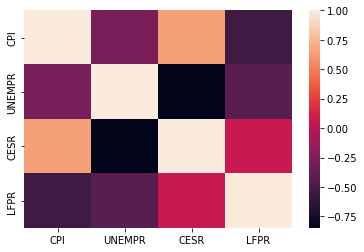

In [77]:
sns.heatmap(finaldf.corr())

Co-Relation Between FeaturesVisualization Through Hwat Map

VISUALIZING DATA

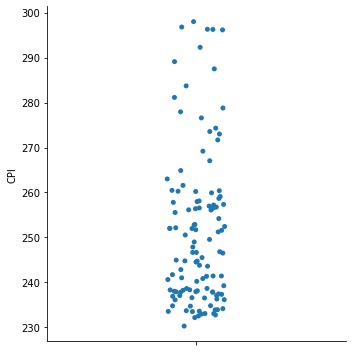

In [56]:
sns.catplot(y='CPI',data=finaldf,kind='strip')

CPI mostly Concentrated Around 230 to 240

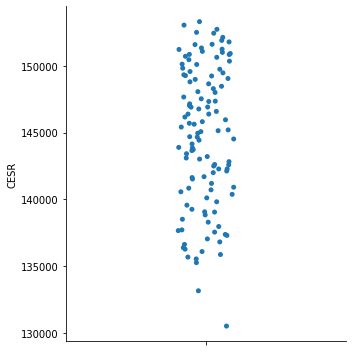

In [57]:
sns.catplot(y='CESR',data=finaldf,kind='strip')

Current Employment Statistics is most of times more than 135000

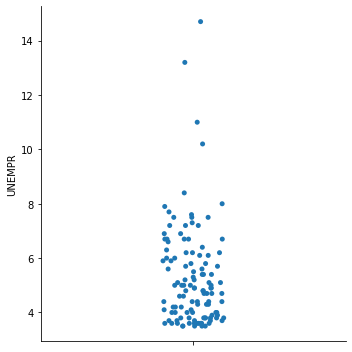

In [58]:
sns.catplot(y='UNEMPR',data=finaldf,kind='strip')

Unemployment Rate Is Concemtrated Around 4% and very few time moer than 14%

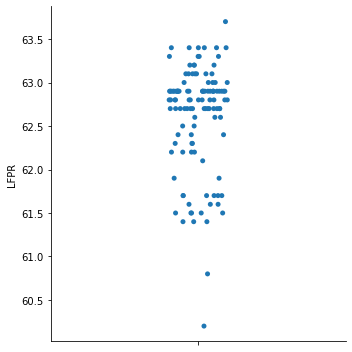

In [59]:
sns.catplot(y='LFPR',data=finaldf,kind='strip')

Labor Force Particapation Rate has been mostly around 63%

Checking Outliers

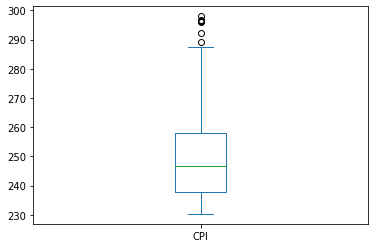

In [62]:
#make a specific kind of plot
finaldf['CPI'].plot(kind = 'box')

Few Outliers Aboce 290 observed

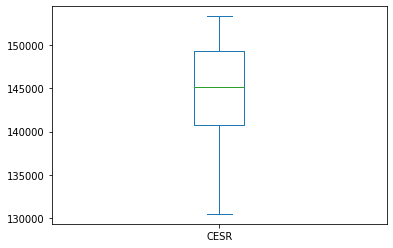

In [63]:
#make a specific kind of plot
finaldf['CESR'].plot(kind = 'box')

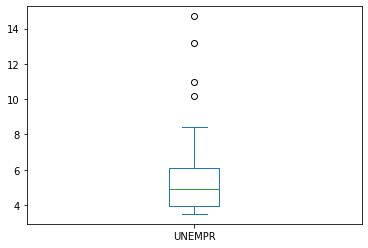

In [64]:
#make a specific kind of plot
finaldf['UNEMPR'].plot(kind = 'box')

Few Outliers Above 10 observed

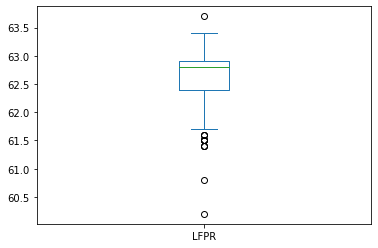

In [65]:
#make a specific kind of plot
finaldf['LFPR'].plot(kind = 'box')

Outliers Above 63.5 and below 61.5 observed.

In [60]:
print(finaldf.skew())

CPI       1.140642
UNEMPR    2.235891
CESR     -0.325844
LFPR     -1.273245
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical

PLOTTING DENSITY GRAPHS AND VISUALIZING SKEWNESS

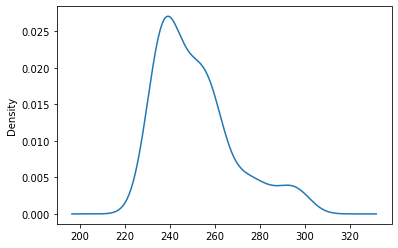

In [66]:
finaldf['CPI'].plot(kind = 'density')

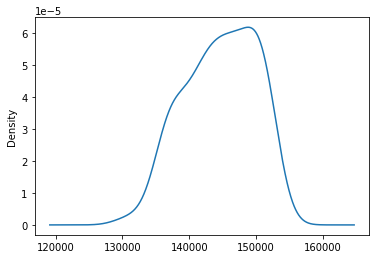

In [67]:
finaldf['CESR'].plot(kind = 'density')

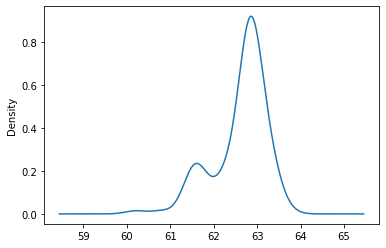

In [68]:
finaldf['LFPR'].plot(kind = 'density')

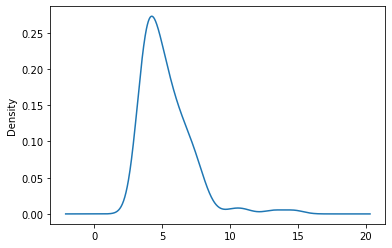

In [69]:
finaldf['UNEMPR'].plot(kind = 'density')

PLOTTING TIME SERIES GRAPHS

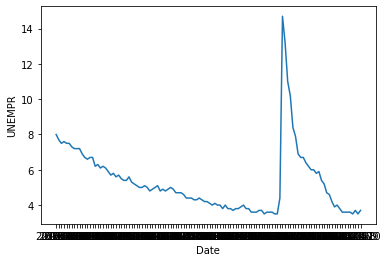

In [71]:
sns.lineplot(x='Date',y='UNEMPR',data=finaldf)

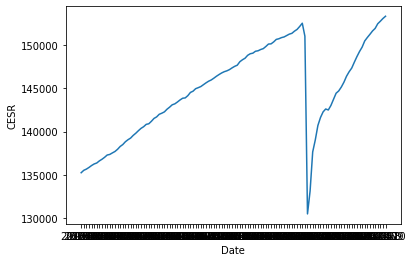

In [72]:
sns.lineplot(x='Date',y='CESR',data=finaldf)

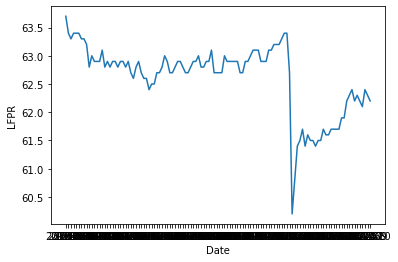

In [73]:
sns.lineplot(x='Date',y='LFPR',data=finaldf)

SAVING MERGED CSV FILE FOR FUTURE ANANYSIS

In [70]:
finaldf.to_csv('mergedData.csv')

GETTING DATA VIA API AND SAVING IT INTO TEXT FILE
https://www.bls.gov/developers/api_python.htm

In [ ]:
import prettytable

In [ ]:
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [ ]:
# Creating a Dictionary
dict={0: {'name': 'Unemployement', 'seriesId': 'LNS14000000'},1: {'name': 'Consumer Price Index', 'seriesId': 'CUUR0000SA0'},
      2: {'name': 'current Employement Statistic', 'seriesId': 'CES0000000001'},3: {'name': 'Unemployment Rate', 'seriesId': 'LNS14000006'},
      4: {'name': 'Consumer Price Index for All Urban Consumers', 'seriesId': 'CUSR0000SA0'},5: {'name': 'Labor Force Participation Rate', 'seriesId': 'LNS11300000'},
      6: {'name': 'Urban Consumers', 'seriesId': 'CUUR0000SA0L1E'},7: {'name': 'Current Employment Statistics', 'seriesId': 'CES3000000001'},
      8: {'name': 'Average Hourly Earnings of All Employees', 'seriesId': 'CES0500000003'}}

In [ ]:

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": [dict[0]['seriesId'],dict[1]['seriesId'],
                               dict[2]['seriesId'],dict[3]['seriesId'],
                               dict[4]['seriesId'],dict[5]['seriesId'],
                               dict[6]['seriesId'],dict[7]['seriesId'],
                               dict[8]['seriesId']],"startyear":"2014", "endyear":"2021"})
#data = json.dumps({"seriesid": ['CUUR0000SA0','SUUR0000SA0'],"startyear":"2021", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)
for series in json_data['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [ ]:
data_url0 = f"{base_url}{dict[0]['seriesId']}"
print(data_url0)

data_url1 = f"{base_url}{dict[1]['seriesId']}"
print(data_url1)

data_url2 = f"{base_url}{dict[2]['seriesId']}"
print(data_url2)

data_url3 = f"{base_url}{dict[3]['seriesId']}"
print(data_url3)

data_url4 = f"{base_url}{dict[4]['seriesId']}"
print(data_url4)

data_url5 = f"{base_url}{dict[5]['seriesId']}"
print(data_url5)

data_url6 = f"{base_url}{dict[6]['seriesId']}"
print(data_url6)

data_url7 = f"{base_url}{dict[7]['seriesId']}"
print(data_url7)

data_url8 = f"{base_url}{dict[8]['seriesId']}"
print(data_url8)

In [ ]:
import requests
#url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/CUUR0000SA0' # using the Inflation & Prices average price series
data0 = requests.get(data_url0).json()
print('Status: ' + data0['status'])

data1 = requests.get(data_url1).json()
print('Status: ' + data1['status'])

data2 = requests.get(data_url2).json()
print('Status: ' + data2['status'])

data3 = requests.get(data_url3).json()
print('Status: ' + data3['status'])

data4 = requests.get(data_url4).json()
print('Status: ' + data4['status'])

data5 = requests.get(data_url5).json()
print('Status: ' + data5['status'])

data6 = requests.get(data_url6).json()
print('Status: ' + data6['status'])

data7 = requests.get(data_url7).json()
print('Status: ' + data7['status'])

data8 = requests.get(data_url8).json()
print('Status: ' + data8['status'])

In [ ]:
# read the data as a data frame
#import pandas as pd
# get months and years and concatenate them
date0 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data0]
date0

# read the data as a data frame
#import pandas as pd
# get months and years and concatenate them
date1 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data1]
date1

# read the data as a data frame
#import pandas as pd
# get months and years and concatenate them
date2 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data2]
date2

# read the data as a data frame
#import pandas as pd
# get months and years and concatenate them
date3 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data3]
date3

# read the data as a data frame
#import pandas as pd
# get months and years and concatenate them
date4 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data4]
date4

# read the data as a data frame
import pandas as pd
# get months and years and concatenate them
date5 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data5]
date5

# read the data as a data frame
import pandas as pd
# get months and years and concatenate them
date6 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data6]
date6

# read the data as a data frame
import pandas as pd
# get months and years and concatenate them
date7 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data7]
date7

# read the data as a data frame
import pandas as pd
# get months and years and concatenate them
date8 = ['{}-{}'.format(i['period'].replace("M", ""), i['year']) for i in data8]
date8

In [ ]:
# get moths as a list
month0 = [i['periodName'] for i in data0]
month0

# get moths as a list
month1 = [i['periodName'] for i in data1]
month1

# get moths as a list
month2 = [i['periodName'] for i in data2]
month2

# get moths as a list
month3 = [i['periodName'] for i in data3]
month3

# get moths as a list
month4 = [i['periodName'] for i in data4]
month4

# get moths as a list
month5 = [i['periodName'] for i in data5]
month5

# get moths as a list
month6 = [i['periodName'] for i in data6]
month6

# get moths as a list
month7 = [i['periodName'] for i in data7]
month7

# get moths as a list
month8 = [i['periodName'] for i in data8]
month8